Stats descriptives des bases de données pour une première analyse

1) Importation des bases que l'on va utiliser

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text #à importer dans le terminal

# Importer 3 bases CSV
df_voit = pd.read_csv("../Bases/q_voitvul_public_V3.csv", delimiter=";",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire
df_tcmmen = pd.read_csv("../Bases/tcm_men_public_V3.csv", delimiter=",",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire
df_men = pd.read_csv("../Bases/q_menage_public_V3.csv", delimiter=";",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire


/tmp/ipykernel_30696/1497674784.py:8: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tcmmen = pd.read_csv("../Bases/tcm_men_public_V3.csv", delimiter=",",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire


2. Analyse des bases chargées  
2.1 Analyse de la base VoitVul : 

In [2]:
#Affiche table voiturevul
print(df_voit.head())  # Affiche les 5 premières lignes

      IDENT_NUMVEH      IDENT_MEN  NUM_VEH     pond_veh  KVROUL  \
0  110000011400001  1100000114000        1  1842.977077       1   
1  110000011500001  1100000115000        1  1948.382441       1   
2  110000011500002  1100000115000        2  1948.382441       1   
3  110000011600001  1100000116000        1   833.453670       1   
4  110000012400001  1100000124000        1  1698.142782       1   

   cylindree_fin energie_fin  energie_agrege hybride  energie_statinfo  ...  \
0            1.6          ES             1.0     NaN               2.0  ...   
1            1.6          GO             2.0     NaN               4.0  ...   
2            1.4          ES             1.0     NaN               2.0  ...   
3            1.6          ES             1.0     NaN               2.0  ...   
4            1.5          GO             2.0     NaN               4.0  ...   

   KVKMVT      KVKM1ANV  indic_km_annu_corr KVKM1ANVT  KVCONS KVGAREJOUR  \
0     4.0   2478.916193             INTERPO   

In [10]:
#Convertir les variables identifiants voitures et ménages en string
df_voit[["IDENT_NUMVEH", "IDENT_MEN"]] = df_voit[["IDENT_NUMVEH", "IDENT_MEN"]].astype(str)
#Création de nouvelles variables energies 
df_voit["energie_groupe"] = df_voit["energie_statinfo"].apply(lambda x: 
                                           "VT" if x in [2, 3, 4, 5] else 
                                           "VE" if x == 1  else 
                                           "VHR" if x == 6 else 
                                           "Autres")

df_voit["energie_cartegrise"] = df_voit["energie_fin"].apply(lambda x: 
                                           "Gazole" if x  in ["GH","GO"] else 
                                           "Essence" if x == ["EH","ES"]  else 
                                           "VHR" if x =="EE" else 
                                           "VE" if x == "EL" else
                                           "Autres")
print(df_voit.columns) #permet d'avoir le nom des variables

Index(['IDENT_NUMVEH', 'IDENT_MEN', 'NUM_VEH', 'pond_veh', 'KVROUL',
       'cylindree_fin', 'energie_fin', 'energie_agrege', 'hybride',
       'energie_statinfo', 'energie_CritAir', 'critair', 'puis_fisc_fin',
       'ANNEE_1mec', 'age', 'ANNEE_acq', 'dur_acq', 'KVAQUIV', 'KVAQUINO01',
       'KVAQUINO02', 'KVAQUINO03', 'KVAQUINO04', 'KVAQUINO05', 'KVAQUINO06',
       'KVAQUINO07', 'KVAQUINO08', 'KVAQUINO09', 'KVAQUINO10', 'KVAQUINO11',
       'KVAQUINO12', 'KVAQUINO13', 'KVAQUINO14', 'KVAQUINO15', 'KVAQUINO16',
       'KVAQUINO17', 'KVAQUINO18', 'KVAQUINO19', 'KVAQUINO20', 'KVAQUINO21',
       'KVQUICONV01', 'KVQUICONV02', 'KVQUICONV03', 'KVQUICONV04',
       'KVQUICONV05', 'KVQUICONV06', 'KVQUICONV07', 'KVQUICONV08',
       'KVQUICONV09', 'KVQUICONV10', 'KVQUICONV11', 'KVQUICONV12',
       'KVQUICONV13', 'KVQUICONV14', 'KVQUICONV15', 'KVQUICONV16',
       'KVQUICONV17', 'KVQUICONV18', 'KVQUICONV19', 'KVQUICONV20',
       'KVQUICONV21', 'KVQUI9COV', 'KVQUICONPV', 'KVKMV', 'indic_km_c

In [7]:
#Statistiques sur les variables quantitatives KM sur les 12 derniers mois et la conso au 100 km
df_voit_filtered = df_voit[df_voit["KVCONS"] <= 200]  # Exclure KVCONS > 30

stats_filtered = df_voit_filtered[["KVKM1ANV","KVCONS"]].rename(
    columns={"KVKM1ANV": "Km12derniersmois", "KVCONS": "Conso100KM"}
).describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

print(stats_filtered)


       Km12derniersmois    Conso100KM
count      14319.000000  14346.000000
mean       11657.561339      6.533940
std         8103.898945      2.468597
min            0.000000      0.000000
1%           396.755928      3.800000
25%         6164.955680      5.500000
50%        10925.837635      6.000000
75%        15907.978735      7.000000
99%        35000.000000     12.000000
max       151260.830720     84.000000


Statistiques sur les variables qualitatives pour voir comment la structure et le type d'individu de la base


energie_groupe
Autres    3.853511e+06
VE        5.395425e+04
VHR       3.653968e+04
VT        3.189195e+07
Name: pond_veh, dtype: float64


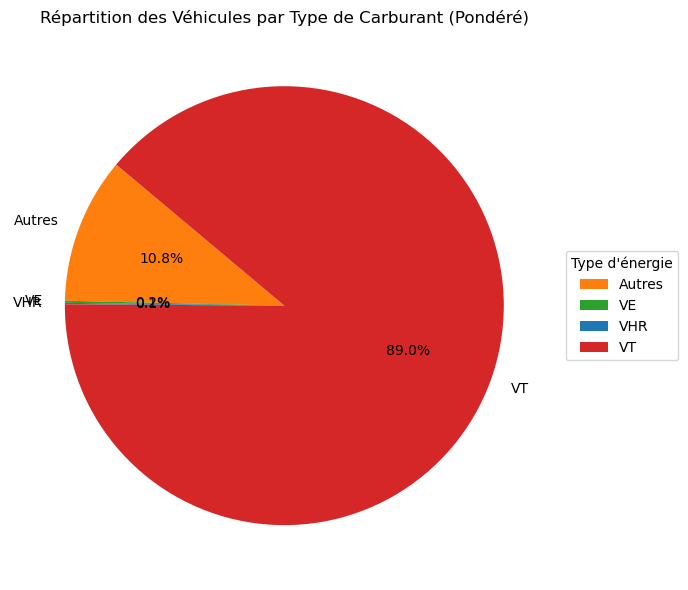

In [14]:
# Définition des couleurs par catégorie
couleurs = {
    "VHR": "#1f77b4",   # Bleu
    "VT": "#d62728",  # Rpuge
    "VE": "#2ca02c",     # Vert
    "Autres": "#ff7f0e"       # Orange
}

#Compter effectifs de chaque type de voiture pour la pop française
frequences_ponderees = df_voit.groupby("energie_groupe")["pond_veh"].sum()
print(frequences_ponderees)
# Tracer le camembert pondéré
plt.figure(figsize=(8, 6))
plt.pie(frequences_ponderees,colors=[couleurs[c] for c in frequences_ponderees.index], labels=frequences_ponderees.index, autopct='%1.1f%%', startangle=140)

# Ajouter une légende à côté
plt.legend(frequences_ponderees.index, title="Type d'énergie", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Répartition des Véhicules par Type de Carburant (Pondéré)")
plt.tight_layout()
plt.show()


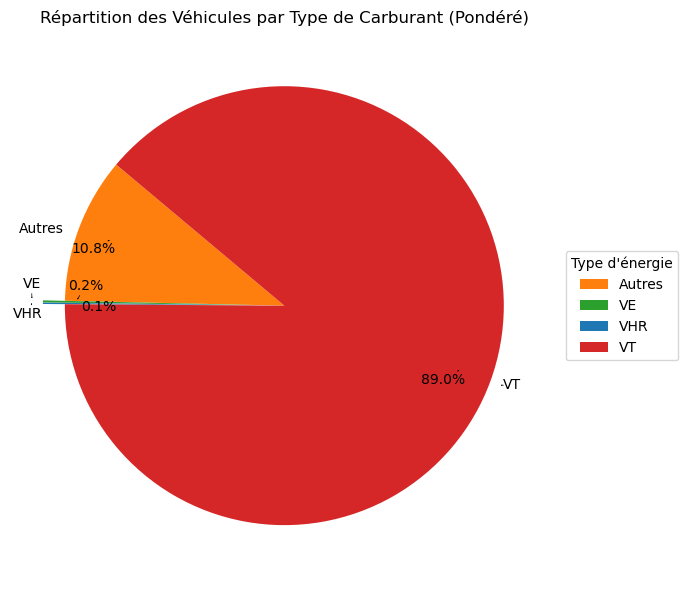

In [18]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Définition des couleurs
couleurs = {
    "VHR": "#1f77b4",    # Bleu
    "VT": "#d62728",     # Rouge
    "VE": "#2ca02c",     # Vert
    "Autres": "#ff7f0e"  # Orange
}

# Compter les effectifs pondérés
frequences_ponderees = df_voit.groupby("energie_groupe")["pond_veh"].sum()

# Définir l'explosion pour mettre en avant les petites parts
explode = [0.1 if val < frequences_ponderees.max() * 0.05 else 0 for val in frequences_ponderees]

# Création du graphique
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    frequences_ponderees, 
    colors=[couleurs[c] for c in frequences_ponderees.index],
    labels=frequences_ponderees.index, 
    autopct='%1.1f%%',  # Affiche tous les % 
    startangle=140, 
    pctdistance=0.85,  # Éloigne les % du centre
    labeldistance=1.05,  # Éloigne les labels
    explode=explode  # Met en avant les petites parts
)

# Ajustement des textes pour éviter le chevauchement
texts.extend(autotexts)  # Inclure les labels et pourcentages
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

# Ajouter une légende
plt.legend(frequences_ponderees.index, title="Type d'énergie", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Répartition des Véhicules par Type de Carburant (Pondéré)")
plt.tight_layout()
plt.show()


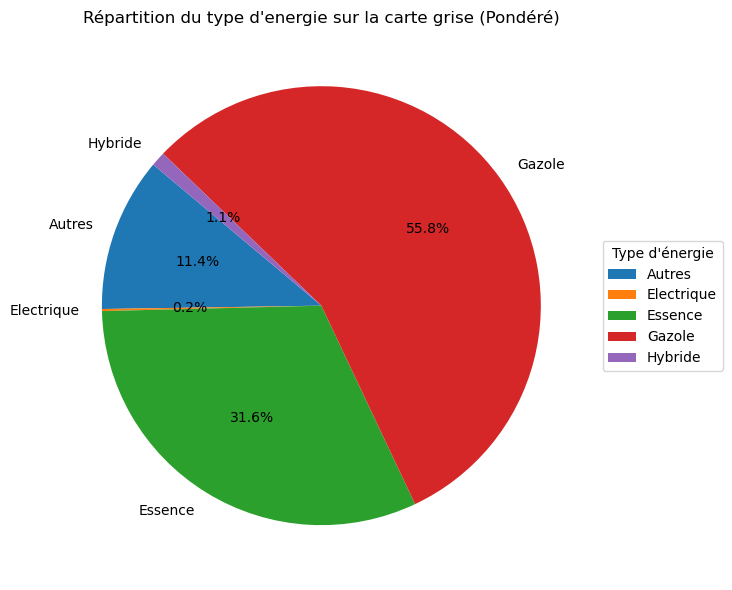

In [6]:
# Compter les fréquences de chaque energie carte Grise
frequences_ponderees = df_voit.groupby("energie_cartegrise")["pond_veh"].sum()
frequences_ponderees = frequences_ponderees.sort_index()
# Tracer le camembert pondéré
plt.figure(figsize=(8, 6))
plt.pie(frequences_ponderees, labels=frequences_ponderees.index, autopct='%1.1f%%', startangle=140)

# Ajouter une légende à côté
plt.legend(frequences_ponderees.index, title="Type d'énergie", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Répartition du type d'energie sur la carte grise (Pondéré)")
plt.tight_layout()
plt.show()

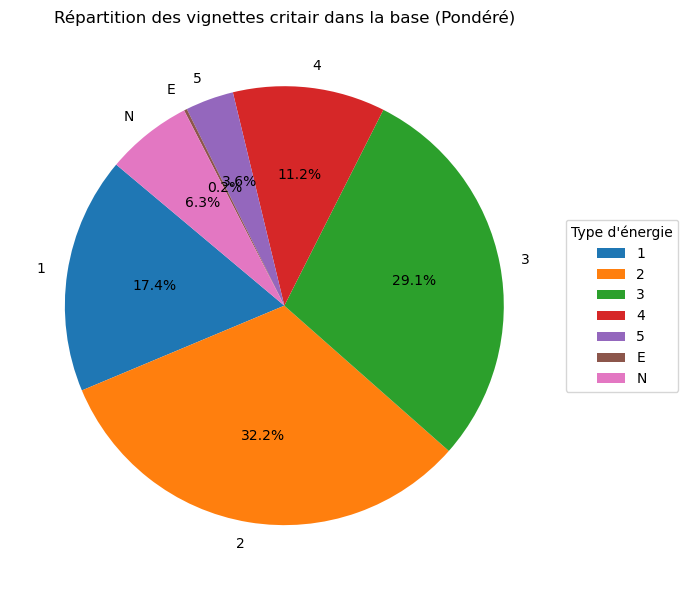

In [7]:
# Compter les fréquences de chaque crit'air
frequences_ponderees = df_voit.groupby("critair")["pond_veh"].sum()
frequences_ponderees = frequences_ponderees.sort_index()
# Tracer le camembert pondéré
plt.figure(figsize=(8, 6))
plt.pie(frequences_ponderees, labels=frequences_ponderees.index, autopct='%1.1f%%', startangle=140)

# Ajouter une légende à côté
plt.legend(frequences_ponderees.index, title="Type d'énergie", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Répartition des vignettes critair dans la base (Pondéré)")
plt.tight_layout()
plt.show()

Après avoir présenter les caractéristiques générales des véhicules, on veut essayer de relier le kilométrage avec les caractéristiques des vehicules (energie, critair, cartegrise...)

In [8]:
#Stats descriptives du km annuel selon le carburant du vehicule
stats_km_quantiles = df_voit.groupby("energie_groupe")["KVKM1ANV"].agg(['count', 'mean', 'std', 'min', 
                                                            lambda x: x.quantile(0.01), 
                                                            'median', 
                                                            lambda x: x.quantile(0.99), 
                                                            'max'])

# Renommer les colonnes pour plus de clarté
stats_km_quantiles.columns = ['count', 'mean', 'std', 'min', '1%', 'median', '99%', 'max']

print(stats_km_quantiles)


                count          mean           std          min           1%  \
energie_groupe                                                                
Autres            285   8597.038593   7276.788720     0.000000    20.000000   
Electrique         33   8237.318464   2589.884495  1044.859917  1659.860096   
Hybride           205  13184.450893  11223.927300   924.334471  1272.553556   
Thermique       17949  11287.811335   8087.016327     0.000000   345.169517   

                      median           99%           max  
energie_groupe                                            
Autres           7344.192636  31582.910384   50000.00000  
Electrique       9423.828432  11680.000000   12000.00000  
Hybride         11024.623154  41854.806186  139779.40826  
Thermique       10292.579543  34998.425117  151260.83072  


In [1]:
from statsmodels.stats.weightstats import DescrStatsW

# Fonction pour les stats pondérées avec quantiles
def weighted_stats(group):
    stats = DescrStatsW(group["KVKM1ANV"], weights=group["pond_veh"])
    return pd.Series({
        'count': group["pond_veh"].sum(),
        'mean': stats.mean,
        'std': stats.std,
        'min': group["KVKM1ANV"].min(),
        '1%': stats.quantile(0.01),
        'median': stats.quantile(0.5),
        '99%': stats.quantile(0.99),
        'max': group["KVKM1ANV"].max()
    })

# Appliquer la fonction aux groupes
stats_km_pond = df_voit.groupby("energie_groupe").apply(weighted_stats).reset_index()

# Affichage
print(stats_km_pond)


NameError: name 'df_voit' is not defined

In [9]:
#Stats descriptives du km annuel selon la vignette crit'air
stats_km_quantiles = df_voit.groupby("critair")["KVKM1ANV"].agg(['count', 'mean', 'std', 'min', 
                                                            lambda x: x.quantile(0.01), 
                                                            'median', 
                                                            lambda x: x.quantile(0.99), 
                                                            'max'])

# Renommer les colonnes pour plus de clarté
stats_km_quantiles.columns = ['count', 'mean', 'std', 'min', '1%', 'median', '99%', 'max']

print(stats_km_quantiles)

         count          mean          std         min           1%  \
critair                                                              
1         3044  10047.310371  6490.639394   41.671252   876.477312   
2         5822  14555.293597  8147.844814    0.476185  1000.000000   
3         5145  10625.104432  7577.606074    5.000000   451.650687   
4         2015  10033.732746  8272.065571   10.000000   500.000000   
5          652   8393.403802  6227.643231    4.874301   183.799288   
E           39   7581.577162  3035.331799  700.000000   831.046769   
N         1170   5570.877018  8080.394878    0.000000    22.413115   

               median           99%           max  
critair                                            
1        10983.476300  25494.011130  139779.40826  
2        14490.573761  37548.980870  112359.53988  
3         9446.122133  33258.320110  148756.78954  
4         8805.625000  30000.000000  151260.83072  
5         7470.845495  28606.829538   50000.00000  
E    

    2.2 Analyse de la base tcm_men : 

In [5]:
#Affiche table tcm_menage
print(df_tcmmen.head())

       ident_men     ident_log  vague_enq  BS    pond_menC  NPERS  NCOUPLES  \
0  1100000114000  110000011400          1   0  1842.977077      1         0   
1  1100000115000  110000011500          1   0  1948.382441      4         1   
2  1100000116000  110000011600          1   0   833.453670      2         1   
3  1100000124000  110000012400          2   0  1698.142782      2         1   
4  1100000125000  110000012500          2   0  1994.633496      2         1   

   NENFANTS  NACTIFS  NENFACT  ...  pop_10min_pieton_train_res  \
0         0        0        0  ...                          80   
1         2        2        0  ...                          80   
2         0        0        0  ...                           0   
3         0        2        0  ...                          50   
4         0        1        0  ...                          50   

   pop_10min_voiture_tram_metro_res  pop_10min_voiture_train_res  \
0                                 0                         

In [15]:
#Convertir les variables identifiants voitures et ménages en string
df_tcmmen[["ident_log", "ident_men"]] = df_tcmmen[["ident_log", "ident_men"]].astype(str)


In [22]:
#Vérifier que la somme des pondérations des ménages vaut le nombre total de ménages en France
tot_pond_menC=df_tcmmen[["pond_menC"]].sum()
print(tot_pond_menC)

#Nombre moyen de personnes dans un ménage
moy_NPERS=df_tcmmen[["NPERS"]].mean()
print(moy_NPERS)


pond_menC    2.925310e+07
dtype: float64
NPERS    2.292007
dtype: float64


In [32]:
#Type de ménage au sens du TCM : "TYPMEN5",
#Diplôme le plus élevé de la PR (code regroupé) : "DIPDETPR",
#Catégorie socioprofessionnelle du ménage : "CSMEN",
#Département de résidence : "DEP_RES",
#Région de la commune de résidence : "REG_res"
#variables de localisation...

nom_col_quanti=["quartile_rev","decile_rev"]

for col in nom_col_quanti :
    print("Résumé statistique pour la variable", col)
    print(df_tcmmen[col].describe())
    
print(df_tcmmen["quartile_rev"].head())


Résumé statistique pour la variable quartile_rev
count    13825.000000
mean         2.612658
std          1.115079
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: quartile_rev, dtype: float64
Résumé statistique pour la variable decile_rev
count    13825.000000
mean         5.750741
std          2.872370
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: decile_rev, dtype: float64
0    3
1    4
2    2
3    4
4    3
Name: quartile_rev, dtype: int64


    2.3 Analyse de la base men : 

In [8]:
#On affiche la base et on regarde les variables contenus par celle-ci

print(df_men.head())
print(df_men.columns)

#On passe la variable identifiant menage en str
df_men[["IDENT_MEN"]] = df_men[["IDENT_MEN"]].astype(str)

       IDENT_MEN    pond_menC  JNBVEH  JNBVHS  JNBVPHS  JNBCCHS  JNBVULHS  \
0  1100000114000  1842.977077       1     2.0      NaN      NaN       NaN   
1  1100000115000  1948.382441       2     2.0      NaN      NaN       NaN   
2  1100000116000   833.453670       1     2.0      NaN      NaN       NaN   
3  1100000124000  1698.142782       1     2.0      NaN      NaN       NaN   
4  1100000125000  1994.633496       2     2.0      NaN      NaN       NaN   

   JNBMOTO  JNBCYCLO  JNBAUTVEH  ...  JUTILMOTO  JUTILCYCLO  JUTILAUTVEH  \
0        0         0          0  ...        NaN         NaN          NaN   
1        0         0          0  ...        NaN         NaN          NaN   
2        0         0          0  ...        NaN         NaN          NaN   
3        2         0          0  ...        2.0         NaN          NaN   
4        0         0          0  ...        NaN         NaN          NaN   

   JUTILVELOAD  JUTILVELOENF  JVOLVELO  JPLUSVELO  JNBKVM  JUTIL2RM  BLOGDIST  


In [ ]:
#Part de la population ayant une voiture
